<a href="https://colab.research.google.com/github/satvikcodelegend/DEVSOC-25/blob/main/Copy_of_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [6]:
# Import the required libraries


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe



Load the datasets from GitHub. Train dataset has already been loaded for you in df below. To get test dataset use the commented code.

In [25]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')


Let's see what the first 5 rows of this dataset looks like

In [26]:
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [28]:
# Do the one-hot encoding here
pd.get_dummies(df, columns=['Utilities'], drop_first=True)

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_NoSeWa
0,11553,1051,1159,336,0,5,158000,False
1,8400,1052,1052,288,0,5,138500,False
2,8960,1008,1028,360,0,6,115000,False
3,11100,0,930,308,0,7,84900,False
4,15593,1304,2287,667,0,4,225000,False
...,...,...,...,...,...,...,...,...
1309,9020,1127,1165,490,0,7,174900,False
1310,10793,780,1620,462,0,5,152000,False
1311,8885,864,902,484,0,5,131000,False
1312,11275,710,2978,564,0,7,242000,False


In [29]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
display(X.head())

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities
0,0.089284,-0.016786,-0.674540,-0.642793,-0.066932,-0.523424,AllPub
1,-0.213127,-0.014490,-0.878483,-0.867218,-0.066932,-0.523424,AllPub
2,-0.159416,-0.115512,-0.924228,-0.530580,-0.066932,0.375634,AllPub
3,0.045836,-2.429816,-1.111017,-0.773707,-0.066932,1.274692,AllPub
4,0.476769,0.564086,1.475446,0.904807,-0.066932,-1.422482,AllPub


### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $

*   List item
*   List item

(X, Y)$. These represent the features and targets respectively

In [30]:
# Convert to numpy array

np_array = df.to_numpy()
print(np_array)

[[11553 1051 1159 ... 5 'AllPub' 158000]
 [8400 1052 1052 ... 5 'AllPub' 138500]
 [8960 1008 1028 ... 6 'AllPub' 115000]
 ...
 [8885 864 902 ... 5 'AllPub' 131000]
 [11275 710 2978 ... 7 'AllPub' 242000]
 [10206 0 944 ... 3 'AllPub' 82000]]


## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the cae of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

In [31]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')
df = pd.get_dummies(df, columns=['Utilities'], drop_first=True)
np_array = df.to_numpy()
X = df.drop('SalePrice', axis=1).to_numpy()
y = df['SalePrice'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

n_features = X_train_scaled.shape[1]
weights = np.random.randn(n_features)
bias = np.random.randn()

y_pred = np.dot(X_train_scaled, weights) + bias

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of weights:", weights.shape)
print("Shape of predictions:", y_pred.shape)

Shape of X_train_scaled: (1051, 7)
Shape of weights: (7,)
Shape of predictions: (1051,)


How well does our model perform? Try comparing our predictions with the actual values

In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 38303090828.03308


### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

In [33]:
def mse_loss_fn(y_true, y_pred):
    m = len(y_true)
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

cost = mse_loss_fn(y_train, y_pred)
print("Initial Cost:", cost)


Initial Cost: 19151545414.01654


Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

In [34]:
def gradient_descent(X, y, weights, bias, learning_rate, n_iters):
    m = len(y)
    loss_history = []

    for i in range(n_iters):
        y_pred = np.dot(X, weights) + bias
        error = y_pred - y

        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        weights -= learning_rate * dw
        bias -= learning_rate * db
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        loss_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights, bias, loss_history



Update the weights using the gradients

In [35]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate

    Args:
        weights: The current weights of the model
        bias: The current bias of the model

        gradients_weights: The gradients of the loss function with respect to the weights
        gradients_bias: The gradients of the loss function with respect to the bias

        lr: The learning rate

    Returns:
        weights_new: The updated weights of the model

    """
    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr * gradients_bias
    return weights_new, bias_new

Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [38]:
NUM_EPOCHS = 1000
LEARNING_RATE = 0.01

losses = []
weights, bias, losses = gradient_descent(X_train_scaled, y_train, weights, bias, LEARNING_RATE, NUM_EPOCHS)


Iteration 0, Cost: 19151545414.0165
Iteration 100, Cost: 3289185098.3574
Iteration 200, Cost: 1352636934.5807
Iteration 300, Cost: 1092450412.4642
Iteration 400, Cost: 1056760044.5293
Iteration 500, Cost: 1051716183.3319
Iteration 600, Cost: 1050955067.6040
Iteration 700, Cost: 1050824176.5341
Iteration 800, Cost: 1050796585.5497
Iteration 900, Cost: 1050789336.8712


Now use matplotlib to plot the loss graph

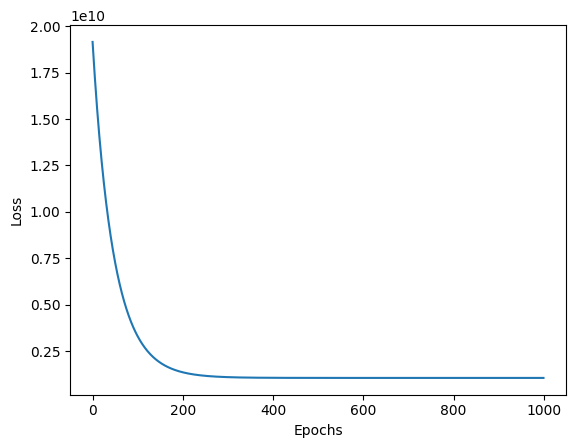

In [39]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

To load test data from GitHub, use the code below.


In [40]:
df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')
print(df_test)

# Let's find all the columns that are missing in the test set
missing_cols = set(df.columns) - set(df_test.columns)

# Add these columns to the test set with all zeros
for col in missing_cols:
    df_test[col] = 0

if 'Utilities_AllPub' not in df_test.columns:
    df_test = df_test.join(pd.get_dummies(df_test['Utilities'], dtype = 'int32', prefix = 'Utilities'))
    df_test = df_test.drop('Utilities', axis = 1)



     LotArea  TotalBsmtSF  GrLivArea  GarageArea  PoolArea  OverallCond  \
0      15623         2396       4476         813       555            5   
1      11952          808       1969         534         0            6   
2       7558          896       1913         342         0            6   
3       6762         1187       1208         632         0            5   
4       8529         1454       1434         527         0            5   
..       ...          ...        ...         ...       ...          ...   
141     9135         1536       1536         532         0            5   
142    11639         1428       1428         480         0            5   
143    11475         1584       1776         888         0            5   
144     5925          907       1131         672         0            7   
145    14559         1008       1363         288         0            7   

    Utilities  SalePrice  
0      AllPub     745000  
1      AllPub     190000  
2      AllPub     

Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [41]:
# Scale the features

# Fill NaN values
df_test.fillna(0, inplace=True)

# Scale features


# Check for unexpected NaNs




# Convert to numpy array
x_test = df_test.copy().drop('SalePrice', axis=1).to_numpy() # (N, D)
y_test = df_test.copy()['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)
print(x_test.shape)


(146, 8)


In [42]:
extra_cols = list(set(df_test.columns) - set(df.columns))
print("Extra columns in df_test:", extra_cols)

missing_cols = list(set(df.columns) - set(df_test.columns))
print("Missing columns in df_test:", missing_cols)

Extra columns in df_test: ['Utilities_AllPub']
Missing columns in df_test: []


In [43]:
df_test_processed = df_test.copy()
df_test_processed.fillna(0, inplace=True)
if 'Utilities' in df_test_processed.columns:
  df_test_processed = pd.get_dummies(df_test_processed, columns=['Utilities'], drop_first=True)

missing_cols = set(df.columns) - set(df_test_processed.columns)
for c in missing_cols:
    df_test_processed[c] = 0

extra_cols = set(df_test_processed.columns) - set(df.columns)
for c in extra_cols:
    df_test_processed = df_test_processed.drop(c, axis=1)

df_test_processed = df_test_processed[df.columns]
X_test = df_test_processed.drop('SalePrice', axis=1)
y_test = df_test_processed['SalePrice'].to_numpy().reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
y_pred_test = np.dot(X_test_scaled, weights) + bias

loss_test = mse_loss_fn(y_test.flatten(), y_pred_test.flatten())
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_test:", y_pred_test.shape)
print("\nTest Loss (MSE):", loss_test)


Shape of X_test_scaled: (146, 7)
Shape of y_test: (146, 1)
Shape of y_pred_test: (146,)

Test Loss (MSE): 1579698043.2924702


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [44]:
idx = np.random.randint(0, y_test.shape[0], 5)
y_pred_test_sample = y_pred_test[idx].round().astype(int)
y_true_test_sample = y_test[idx].flatten().round().astype(int)

print('Predicted SalePrice: \t', y_pred_test_sample.squeeze().tolist())
print('Actual SalePrice: \t', y_true_test_sample.squeeze().tolist())

print('\nTest Loss: \t\t', loss_test)

Predicted SalePrice: 	 [193905, 189044, 158045, 144894, 144894]
Actual SalePrice: 	 [181000, 175000, 149000, 139600, 139600]

Test Loss: 		 1579698043.2924702
